In [221]:
import numpy as np
import cv2

from skimage.feature import canny

import matplotlib.pyplot as plt

In [222]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [719]:
img_path = "/content/drive/MyDrive/task_3/1.jpg"

In [720]:
img = cv2.imread(img_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

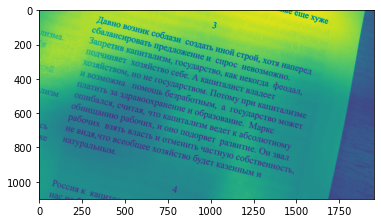

In [721]:
import matplotlib.pyplot as plt
plt.imshow(gray)

In [722]:
edges = cv2.Canny(gray, 150, 200)

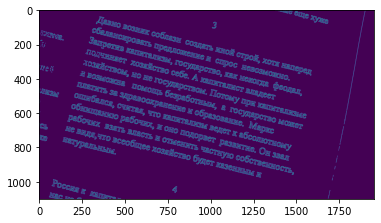

In [723]:
plt.imshow(edges)

In [802]:
def merge_hough_parts(h1, h2):
    H = h1.shape[0]
    W = 1 if len(h1.shape) == 1 else h1.shape[1]

    result = np.zeros([H, 2*W])

    for t in range(2 * W):
        t0 = int(t / 2)
        shift = t - t0
        result[:, t] = h1[:, t0] + np.concatenate([h2[shift: , t0], h2[: shift, t0]], axis=0)
    return result


def fast_Hough_transform(edges):
    n = edges.shape[1]
    if n < 2:
        return edges[:, 0].reshape((edges.shape[0], 1))
    else:
        return merge_hough_parts(fast_Hough_transform(edges[:, : n // 2]), fast_Hough_transform(edges[:, n // 2: ]))

In [803]:
x_s_space = fast_Hough_transform(edges)

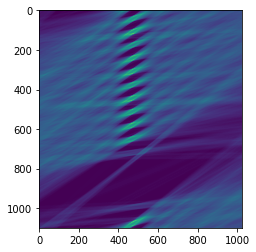

In [804]:
plt.imshow(x_s_space)

In [784]:
value = 0
x, s = 0., 0.
for i in range(x_s_space.shape[0]):
    for j in range(x_s_space.shape[1]):
        if x_s_space[i, j] > value:
            value = x_s_space[i, j]
            x = i
            s = j

In [785]:
print((x, s))

(459, 465)


In [786]:
np.arctan(s / edges.shape[1])

0.23362786455676698

In [787]:
angle = np.rad2deg(np.arctan(s / edges.shape[1]))

In [788]:
angle

13.385890615756782

In [791]:
def rotate_image(img, angle):
    rows, cols, _ = img.shape

    M = cv2.getRotationMatrix2D((cols/2,rows/2), round(angle), 1)
    dst = cv2.warpAffine(img,M,(cols,rows),flags=cv2.INTER_LINEAR)
    fig2= plt.figure (figsize=(15,15))

    plt.imshow (dst[:,:,::-1])

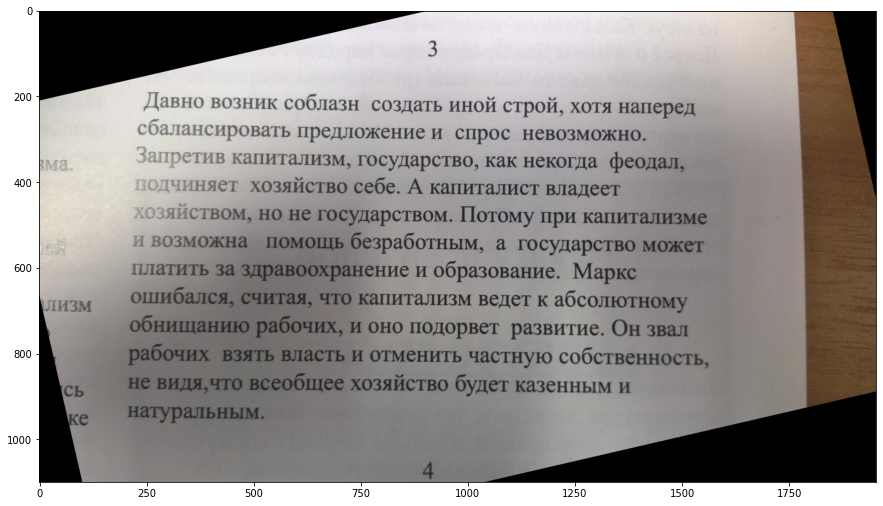

In [792]:
rotate_image(img, angle)

Для других изображений, где другой тип прямой, которую мы ищем при помощи алгоритма, нужно делать препроцессинг в виде поворотов/отображений, чтобы задача сводилась к уже решенной

Сделаем замеры скорости

In [820]:
import time

In [821]:
img_side_sz = [2 ** i for i in range(5, 12)]

In [831]:
img_side_sz

[32, 64, 128, 256, 512, 1024, 2048]

In [832]:
time_list = list()
for side in img_side_sz:
    img = np.random.uniform(low=0, high=255, size=(side, side))
    start = time.time()
    x_s_space = fast_Hough_transform(img)
    end = time.time()
    time_list.append(end - start)

In [837]:
time_list_in_ms = np.array(time_list) * 1000

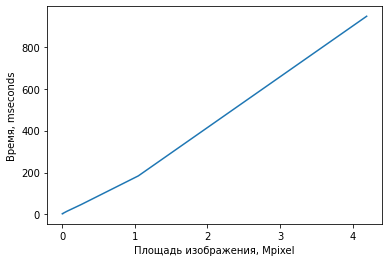

In [841]:
plt.plot((np.array(img_side_sz) ** 2) / 1000000, time_list_in_ms)
plt.xlabel('Площадь изображения, Mpixel')
plt.ylabel('Время, mseconds')
plt.show()